<a href="https://colab.research.google.com/github/Shailendra114/Books-Recommendation-System-Unsupervised-Machine-Learning-/blob/main/Books_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Books Recommendaton System

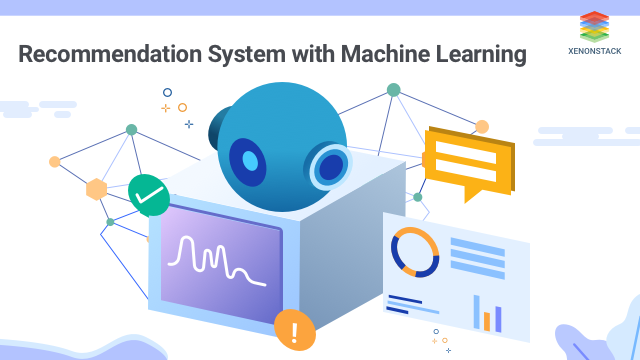

# Objective

Recommender systems have become a part of daily life for users of Amazon and Netflix and even social media. While some sites might use these systems to improve the customer experience (if you liked movie A, you might like movie B) or increase sales (customers who bought product C also bought product D), others are focused on customized advertising and suggestive marketing. As a book lover and former book store manager, I have always wondered where I can find good book recommendations that are both personalized to my interests and also capable of introducing me to new authors and genres. The purpose of this project is to create just such a recommender system (RS).